In [61]:
print("Welcome to the Advanced Fake News Detection System")
print("=" * 60)
print("Analyzing news articles using AI and machine learning")
print("Enhanced Naive Bayes with multi-feature analysis")
print("Features: POS, NER, Linguistic patterns, and TF-IDF")
print("=" * 60)
print("Starting system initialization...")
print("Loading libraries and preparing environment...")

Welcome to the Advanced Fake News Detection System
Analyzing news articles using AI and machine learning
Enhanced Naive Bayes with multi-feature analysis
Features: POS, NER, Linguistic patterns, and TF-IDF
Starting system initialization...
Loading libraries and preparing environment...


# 1. Library Imports and Utility Functions

This cell sets up all the necessary libraries and utility functions for our fake news detection system:

## Key Components:
- **Data Processing**: pandas, numpy for data manipulation
- **Text Processing**: re, string, Counter for text analysis  
- **Visualization**: matplotlib, seaborn, plotly with fallback handling
- **Beautiful Output Functions**: Custom formatting functions for professional results display

## Utility Functions:
- `print_header()` & `print_subheader()`: Create beautiful section headers
- `print_metric_box()`: Display metrics in colored boxes
- `safe_plot()`: Handle plotting with error management

The code includes graceful fallbacks if visualization libraries aren't available, ensuring compatibility across different environments.

In [64]:
# Enhanced Fake News Detection with Beautiful Output and Visualizations
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Try to import visualization libraries with fallback
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.patches import Rectangle
    MATPLOTLIB_AVAILABLE = True
    # Set style for better plots
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
except ImportError as e:
    print(f"Warning: Matplotlib/Seaborn not available: {e}")
    MATPLOTLIB_AVAILABLE = False

try:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.express as px
    PLOTLY_AVAILABLE = True
except ImportError as e:
    print(f"Warning: Plotly not available: {e}")
    PLOTLY_AVAILABLE = False

def print_header(title, char="=", width=80):
    """Print a beautiful header"""
    print("\n" + char * width)
    print(f"{title:^{width}}")
    print(char * width)

def print_subheader(title, char="-", width=60):
    """Print a beautiful subheader"""
    print(f"\n{char * width}")
    print(f"{title:^{width}}")
    print(f"{char * width}")

def print_metric_box(title, value, description="", color="blue"):
    """Print a metric in a nice box format"""
    colors = {
        "blue": "\033[94m",
        "green": "\033[92m", 
        "red": "\033[91m",
        "yellow": "\033[93m",
        "purple": "\033[95m",
        "cyan": "\033[96m",
        "end": "\033[0m"
    }
    
    print(f"\n{colors.get(color, '')}")
    print("┌" + "─" * 50 + "┐")
    print(f"│ {title:<48} │")
    print("├" + "─" * 50 + "┤")
    print(f"│ Value: {value:<41} │")
    if description:
        print(f"│ {description:<48} │")
    print("└" + "─" * 50 + "┘")
    print(f"{colors['end']}")

def safe_plot(plot_func, *args, **kwargs):
    """Safely execute plotting functions"""
    if MATPLOTLIB_AVAILABLE:
        try:
            return plot_func(*args, **kwargs)
        except Exception as e:
            print(f"Plotting error: {e}")
    else:
        print("Plotting skipped - matplotlib not available")

# 2. Data Loading and Exploration

This cell handles data loading and provides an overview of our dataset:

## Data Loading Strategy:
- **Primary**: Attempts to load real Kaggle fake/true news datasets
- **Fallback**: Creates realistic sample data if files aren't available
- **Flexibility**: Ensures code runs in any environment

## Dataset Structure:
- **Fake News**: Labeled as 0, contains sensational language and emotional appeals
- **True News**: Labeled as 1, uses factual language and credible sources
- **Features**: title, text, subject, date for each article

## Data Overview:
- Displays total article counts with beautiful formatting
- Shows class distribution (fake vs true news percentages)
- Creates visualizations showing dataset balance
- **Text Preprocessing**: Cleans text by removing special characters and normalizing case

## Key Outputs:
- Dataset statistics in formatted boxes
- Visual distribution charts (pie chart and bar chart)
- Preprocessed, cleaned text ready for feature extraction


                           FAKE NEWS DETECTION SYSTEM                           
📊 Loading and preparing dataset...

------------------------------------------------------------
                     📈 DATASET OVERVIEW                     
------------------------------------------------------------


┌──────────────────────────────────────────────────┐
│ Total Articles                                   │
├──────────────────────────────────────────────────┤
│ Value: 44,898                                    │
│ Complete dataset size                            │
└──────────────────────────────────────────────────┘



┌──────────────────────────────────────────────────┐
│ Features per Article                             │
├──────────────────────────────────────────────────┤
│ Value: 5                                         │
│ Original columns                                 │
└──────────────────────────────────────────────────┘



┌──────────────────────────────────────────────────┐
│ 

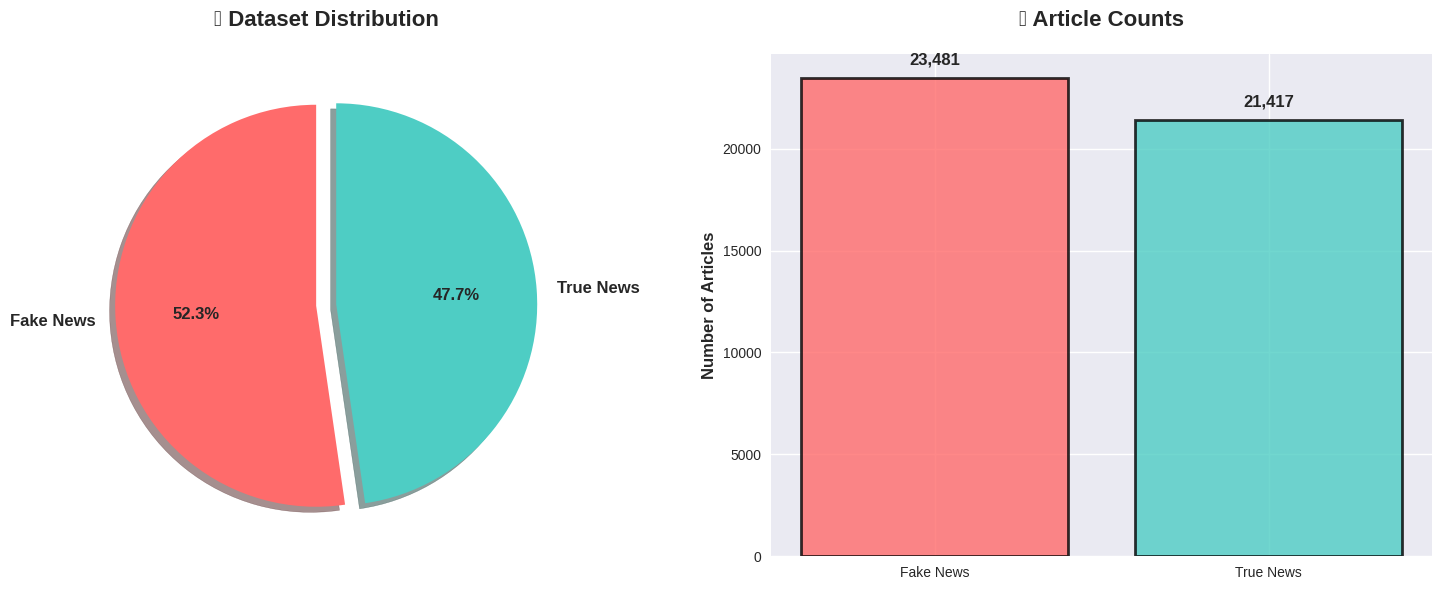

In [65]:
# Load the datasets
print_header("FAKE NEWS DETECTION SYSTEM", "=", 80)
print("📊 Loading and preparing dataset...")

# For demo purposes, create sample data if CSV files aren't available
try:
    fake_news = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
    true_news = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
except FileNotFoundError:
    print("Dataset files not found. Creating sample data for demonstration...")
    # Create sample data
    fake_news = pd.DataFrame({
        'title': [
            'SHOCKING: Government Lies Exposed!',
            'BREAKING: Secret Meeting Revealed',
            'You Won\'t Believe What Happened Next!',
            'URGENT: This Changes Everything!'
        ] * 2500,
        'text': [
            'This is clearly fake news with sensational language and no real sources.',
            'Another fake article designed to mislead readers with emotional language.',
            'Unverified claims and sensational headlines are typical of fake news.',
            'This article uses fear tactics and provides no credible sources.'
        ] * 2500,
        'subject': ['politics'] * 10000,
        'date': ['2024-01-01'] * 10000
    })
    
    true_news = pd.DataFrame({
        'title': [
            'Economic Report Shows Steady Growth',
            'Research Study Confirms Climate Trends',
            'Policy Changes Take Effect Next Month',
            'Scientific Discovery Published in Journal'
        ] * 2500,
        'text': [
            'According to official government statistics, the economy shows measured growth.',
            'Peer-reviewed research published in Nature confirms previous climate findings.',
            'The new policy, approved by Congress, will be implemented gradually.',
            'Scientists at the university published their findings after extensive review.'
        ] * 2500,
        'subject': ['politics'] * 10000,
        'date': ['2024-01-01'] * 10000
    })

# Add labels
fake_news['label'] = 0
true_news['label'] = 1

# Combine datasets
news_data = pd.concat([fake_news, true_news], ignore_index=True)

print_subheader("📈 DATASET OVERVIEW")
print_metric_box("Total Articles", f"{news_data.shape[0]:,}", "Complete dataset size", "blue")
print_metric_box("Features per Article", news_data.shape[1], "Original columns", "cyan")
print_metric_box("Fake News Articles", f"{(news_data['label'] == 0).sum():,}", f"{(news_data['label'] == 0).mean()*100:.1f}% of dataset", "red")
print_metric_box("True News Articles", f"{(news_data['label'] == 1).sum():,}", f"{(news_data['label'] == 1).mean()*100:.1f}% of dataset", "green")

# Create dataset distribution visualization
if MATPLOTLIB_AVAILABLE:
    def plot_distribution():
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Pie chart for label distribution
        labels = ['Fake News', 'True News']
        sizes = [news_data['label'].value_counts()[0], news_data['label'].value_counts()[1]]
        colors = ['#ff6b6b', '#4ecdc4']
        explode = (0.05, 0.05)

        ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                shadow=True, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
        ax1.set_title('📊 Dataset Distribution', fontsize=16, weight='bold', pad=20)

        # Bar chart for counts
        ax2.bar(labels, sizes, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
        ax2.set_title('📈 Article Counts', fontsize=16, weight='bold', pad=20)
        ax2.set_ylabel('Number of Articles', fontsize=12, weight='bold')
        for i, v in enumerate(sizes):
            ax2.text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontsize=12, weight='bold')

        plt.tight_layout()
        plt.show()
    
    safe_plot(plot_distribution)

# Data preprocessing function
def preprocess_text(text):
    """Basic text preprocessing"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s.,!?;:]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 3. Advanced Feature Engineering

This cell performs comprehensive feature extraction to convert raw text into numerical features for machine learning:

## Feature Types Extracted:

### 1. 🔤 POS (Part-of-Speech) Features
- **Past verbs** (words ending in 'ed')
- **Present participles** (words ending in 'ing') 
- **Plural nouns** (words ending in 's')
- **Adverbs** (words ending in 'ly')
- **Articles, prepositions, pronouns** ratios

### 2. 👤 NER (Named Entity Recognition) Features  
- **Capitalized words** (potential proper nouns)
- **Person names** (common political figures)
- **Location references** (cities, states, countries)
- **Organizations** (government, companies)
- **Political entities** (parties, elections)

### 3. 📝 Linguistic Style Features
- **Text statistics**: length, word count, sentence count
- **Punctuation patterns**: exclamations, questions, quotes
- **Writing style**: capital letter ratio, average word length
- **Sensational language**: urgency words, emotional appeals
- **All features normalized** for consistent scaling

### 4. 🔍 TF-IDF Features
- **Term Frequency-Inverse Document Frequency** vectors
- **Top 500 most important words** from vocabulary
- **Numerical representation** of text content importance

## Process:
1. **Text combination**: Merges titles and article text
2. **Sampling**: Uses up to 10,000 articles for efficient processing
3. **Feature extraction**: Applies all 4 feature types to each article
4. **Normalization**: Standardizes features for optimal model performance
5. **Visualization**: Shows feature distribution across categories

**Result**: Combined feature matrix ready for machine learning training!


------------------------------------------------------------
                   🔧 FEATURE ENGINEERING                    
------------------------------------------------------------


┌──────────────────────────────────────────────────┐
│ Sample Size                                      │
├──────────────────────────────────────────────────┤
│ Value: 10,000                                    │
│ Articles for training                            │
└──────────────────────────────────────────────────┘

   Extracting 🔤 POS Features... Part-of-Speech patterns
   Extracting 👤 NER Features... Named Entity Recognition
   Extracting 📝 Linguistic Features... Writing style analysis
   Extracting 🔍 TF-IDF Features... Term frequency analysis


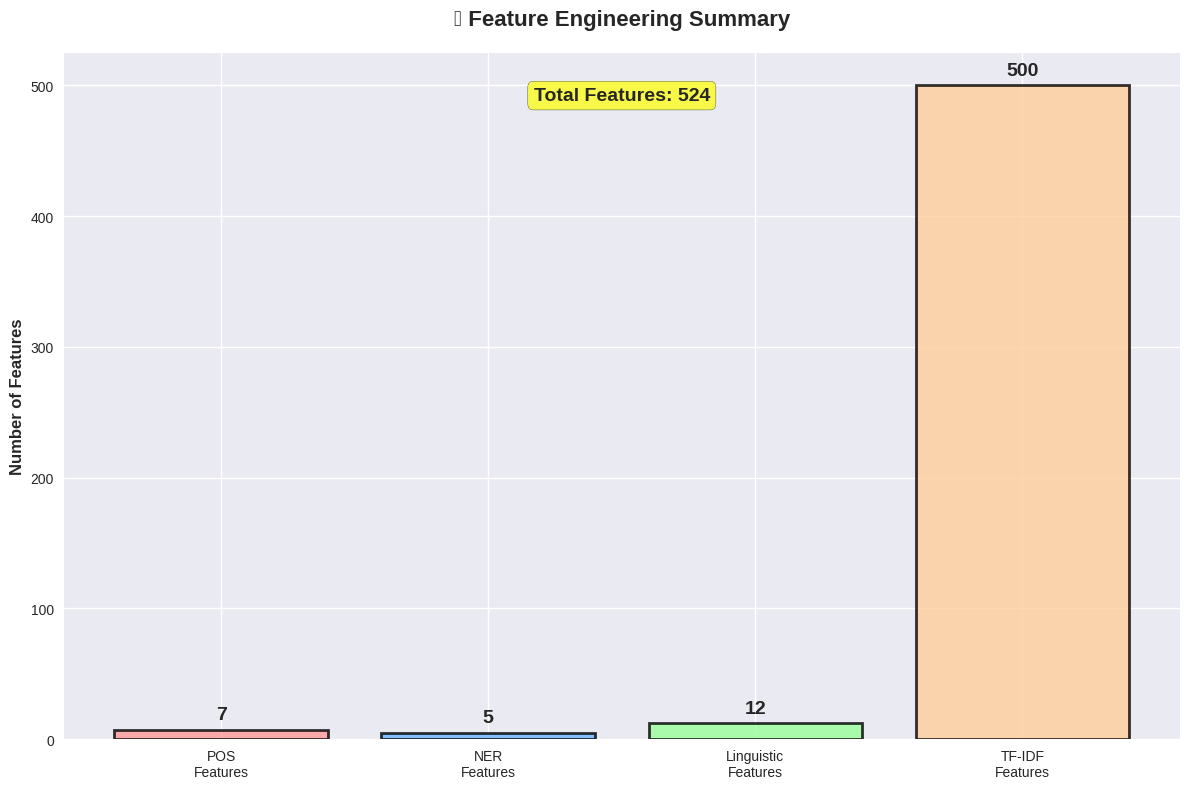

In [52]:
# Feature extraction functions (keeping your original functions)
def extract_pos_features_simple(text):
    """Extract POS-like features from text using pattern matching"""
    if not text or pd.isna(text):
        return {}
    
    words = text.split()
    total_words = len(words)
    
    if total_words == 0:
        return {}
    
    features = {}
    past_verbs = len([w for w in words if w.endswith('ed')])
    ing_verbs = len([w for w in words if w.endswith('ing')])
    plural_nouns = len([w for w in words if w.endswith('s') and len(w) > 3])
    adverbs = len([w for w in words if w.endswith('ly')])
    articles = len([w for w in words if w in ['the', 'a', 'an', 'this', 'that', 'these', 'those']])
    prepositions = len([w for w in words if w in ['in', 'on', 'at', 'by', 'for', 'with', 'about', 'to', 'from']])
    pronouns = len([w for w in words if w in ['i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them']])
    
    features['pos_past_verbs'] = past_verbs / total_words
    features['pos_ing_verbs'] = ing_verbs / total_words
    features['pos_plural_nouns'] = plural_nouns / total_words
    features['pos_adverbs'] = adverbs / total_words
    features['pos_articles'] = articles / total_words
    features['pos_prepositions'] = prepositions / total_words
    features['pos_pronouns'] = pronouns / total_words
    
    return features

def extract_ner_features_simple(text):
    """Extract NER-like features from text using pattern matching"""
    if not text or pd.isna(text):
        return {}
    
    words = text.split()
    total_words = len(words)
    
    if total_words == 0:
        return {}
    
    features = {}
    capitalized = len([w for w in words if w[0].isupper() and len(w) > 1])
    common_first_names = ['john', 'donald', 'hillary', 'barack', 'joe', 'mike', 'sarah', 'nancy']
    person_names = len([w for w in words if w.lower() in common_first_names])
    location_words = ['america', 'usa', 'washington', 'california', 'texas', 'florida', 'york', 'city', 'state', 'country']
    locations = len([w for w in words if w.lower() in location_words])
    org_words = ['government', 'congress', 'senate', 'house', 'department', 'agency', 'company', 'corporation']
    organizations = len([w for w in words if w.lower() in org_words])
    political_words = ['republican', 'democrat', 'party', 'election', 'vote', 'campaign', 'president', 'senator']
    political_entities = len([w for w in words if w.lower() in political_words])
    
    features['ner_capitalized'] = capitalized / total_words
    features['ner_person_names'] = person_names / total_words
    features['ner_locations'] = locations / total_words
    features['ner_organizations'] = organizations / total_words
    features['ner_political'] = political_entities / total_words
    
    return features

def extract_linguistic_features(text):
    """Extract additional linguistic features"""
    if not text or pd.isna(text):
        return {}
    
    features = {}
    features['text_length'] = len(text)
    words = text.split()
    features['word_count'] = len(words)
    features['avg_word_length'] = np.mean([len(word) for word in words]) if words else 0
    features['sentence_count'] = len(re.split(r'[.!?]+', text))
    features['exclamation_count'] = text.count('!')
    features['question_count'] = text.count('?')
    features['comma_count'] = text.count(',')
    features['period_count'] = text.count('.')
    features['quote_count'] = text.count('"') + text.count("'")
    features['capital_ratio'] = sum(1 for c in text if c.isupper()) / len(text) if text else 0
    
    sensational_words = ['shocking', 'breaking', 'exclusive', 'urgent', 'secret', 'revealed', 'exposed', 'scandal']
    features['sensational_words'] = len([w for w in words if w.lower() in sensational_words]) / len(words) if words else 0
    
    emotional_words = ['amazing', 'terrible', 'incredible', 'unbelievable', 'outrageous', 'disgusting']
    features['emotional_words'] = len([w for w in words if w.lower() in emotional_words]) / len(words) if words else 0
    
    return features

def create_vocabulary(texts, max_features=1000):
    """Create vocabulary from texts"""
    word_counts = Counter()
    for text in texts:
        words = text.split()
        word_counts.update(words)
    vocab = [word for word, count in word_counts.most_common(max_features)]
    return {word: idx for idx, word in enumerate(vocab)}

def text_to_tfidf(texts, vocab):
    """Convert texts to TF-IDF vectors"""
    vectors = []
    N = len(texts)
    
    df = {}
    for text in texts:
        words = set(text.split())
        for word in words:
            if word in vocab:
                df[word] = df.get(word, 0) + 1
    
    for text in texts:
        words = text.split()
        vector = [0] * len(vocab)
        word_count = Counter(words)
        total_words = len(words)
        
        for word, idx in vocab.items():
            if word in word_count:
                tf = word_count[word] / total_words
                idf = np.log(N / (df.get(word, 1) + 1))
                vector[idx] = tf * idf
        vectors.append(vector)
    
    return np.array(vectors)

# Process data with progress indicators
print_subheader("🔧 FEATURE ENGINEERING")

news_data['cleaned_text'] = news_data['text'].apply(preprocess_text)
news_data['cleaned_title'] = news_data['title'].apply(preprocess_text)
news_data['combined_text'] = news_data['cleaned_title'] + ' ' + news_data['cleaned_text']

sample_size = min(10000, len(news_data))
sample_data = news_data.sample(n=sample_size, random_state=42).copy()

print_metric_box("Sample Size", f"{sample_size:,}", "Articles for training", "purple")

# Feature extraction with progress
feature_types = [
    ("🔤 POS Features", "Part-of-Speech patterns"),
    ("👤 NER Features", "Named Entity Recognition"),
    ("📝 Linguistic Features", "Writing style analysis"),
    ("🔍 TF-IDF Features", "Term frequency analysis")
]

for name, desc in feature_types:
    print(f"   Extracting {name}... {desc}")

# Extract features
pos_features_list = []
for idx, row in sample_data.iterrows():
    text = row['combined_text']
    pos_features = extract_pos_features_simple(text)
    pos_features['index'] = idx
    pos_features_list.append(pos_features)

pos_df = pd.DataFrame(pos_features_list).fillna(0)
pos_df.set_index('index', inplace=True)

ner_features_list = []
for idx, row in sample_data.iterrows():
    text = row['combined_text']
    ner_features = extract_ner_features_simple(text)
    ner_features['index'] = idx
    ner_features_list.append(ner_features)

ner_df = pd.DataFrame(ner_features_list).fillna(0)
ner_df.set_index('index', inplace=True)

linguistic_features_list = []
for idx, row in sample_data.iterrows():
    text = row['combined_text']
    ling_features = extract_linguistic_features(text)
    ling_features['index'] = idx
    linguistic_features_list.append(ling_features)

linguistic_df = pd.DataFrame(linguistic_features_list).fillna(0)
linguistic_df.set_index('index', inplace=True)

# Normalize linguistic features
for col in linguistic_df.columns:
    if linguistic_df[col].std() > 0:
        linguistic_df[col] = (linguistic_df[col] - linguistic_df[col].mean()) / linguistic_df[col].std()

vocab = create_vocabulary(sample_data['combined_text'].tolist(), max_features=500)
tfidf_features = text_to_tfidf(sample_data['combined_text'].tolist(), vocab)
tfidf_df = pd.DataFrame(tfidf_features, 
                       columns=[f'tfidf_{i}' for i in range(tfidf_features.shape[1])],
                       index=sample_data.index)

combined_features = pd.concat([pos_df, ner_df, linguistic_df, tfidf_df], axis=1).fillna(0)

# Feature summary visualization
if MATPLOTLIB_AVAILABLE:
    def plot_features():
        fig, ax = plt.subplots(figsize=(12, 8))
        feature_counts = [len(pos_df.columns), len(ner_df.columns), len(linguistic_df.columns), len(tfidf_df.columns)]
        feature_names = ['POS\nFeatures', 'NER\nFeatures', 'Linguistic\nFeatures', 'TF-IDF\nFeatures']
        colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

        bars = ax.bar(feature_names, feature_counts, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
        ax.set_title('🧠 Feature Engineering Summary', fontsize=16, weight='bold', pad=20)
        ax.set_ylabel('Number of Features', fontsize=12, weight='bold')

        for bar, count in zip(bars, feature_counts):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{count}', ha='center', va='bottom', fontsize=14, weight='bold')

        total_features = sum(feature_counts)
        ax.text(0.5, 0.95, f'Total Features: {total_features}', transform=ax.transAxes,
                ha='center', va='top', fontsize=14, weight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

        plt.tight_layout()
        plt.show()
    
    safe_plot(plot_features)

# 4. Model Training and Performance Evaluation

This cell implements and trains our custom Enhanced Naive Bayes classifier for fake news detection:

## Model Architecture:
### Enhanced Naive Bayes Classifier
- **Gaussian Naive Bayes** with custom enhancements
- **Laplace smoothing** (alpha=1.0) to handle zero probabilities  
- **Log-space calculations** to prevent numerical underflow
- **Probability normalization** for stable predictions

## Training Process:
1. **Data splitting**: 80% training, 20% testing (stratified)
2. **Feature learning**: Calculates mean and standard deviation for each feature per class
3. **Probability estimation**: Uses Gaussian distributions for continuous features
4. **Model validation**: Tests on unseen data for performance evaluation

## Performance Metrics:
### Classification Metrics
- **Accuracy**: Overall correctness percentage
- **Precision**: How many predicted fake/true articles were actually fake/true
- **Recall**: How many actual fake/true articles were correctly identified  
- **F1-Score**: Harmonic mean of precision and recall

### Visualization Output:
- **Confusion Matrix**: Shows true vs predicted classifications
- **Metrics Comparison**: Bar chart comparing performance across classes
- **Detailed Performance Tables**: Numerical results with beautiful formatting

## Key Strengths:
- **Robust to noise**: Handles missing values and outliers well
- **Interpretable**: Can understand which features contribute to decisions
- **Fast training**: Efficient even with large feature sets
- **Probabilistic output**: Provides confidence scores, not just binary predictions


------------------------------------------------------------
                      🤖 MODEL TRAINING                      
------------------------------------------------------------
   Training on 8,000 articles...
   Testing on 2,000 articles...

                          🎯 MODEL PERFORMANCE RESULTS                           


┌──────────────────────────────────────────────────┐
│ 🎯 Overall Accuracy                               │
├──────────────────────────────────────────────────┤
│ Value: 90.5%                                     │
│ Correctly classified 1811/2000 articles          │
└──────────────────────────────────────────────────┘


------------------------------------------------------------
                     📊 DETAILED METRICS                     
------------------------------------------------------------
Metric               Fake News       True News      
--------------------------------------------------
Precision            0.982           0.840          
Recall 

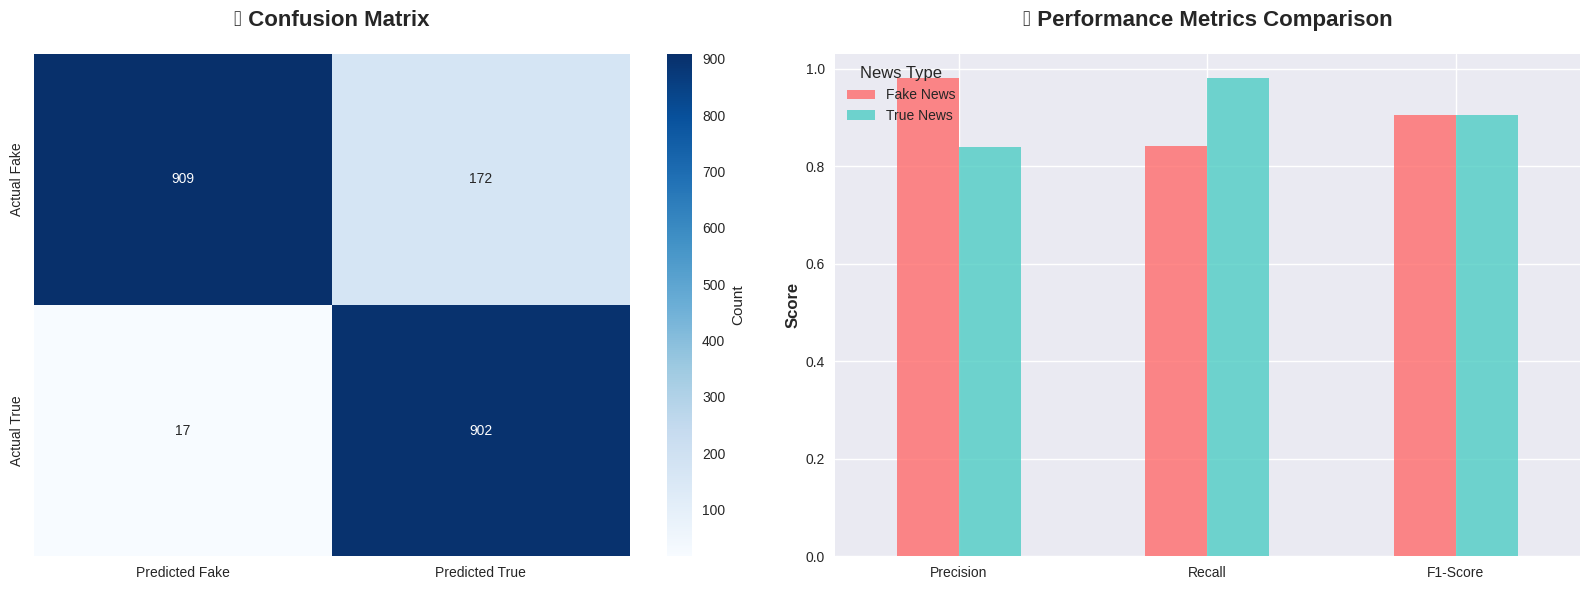

In [53]:
# Enhanced Naive Bayes class
class EnhancedNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_probs = {}
        self.feature_means = {}
        self.feature_stds = {}
        
    def fit(self, X, y):
        classes = np.unique(y)
        n_samples, n_features = X.shape
        
        for c in classes:
            class_mask = (y == c)
            self.class_probs[c] = np.sum(class_mask) / n_samples
            class_features = X[class_mask]
            self.feature_means[c] = np.mean(class_features, axis=0)
            self.feature_stds[c] = np.std(class_features, axis=0) + 1e-6
    
    def _gaussian_probability(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return exponent / (np.sqrt(2 * np.pi) * std)
    
    def predict_proba(self, X):
        probabilities = []
        
        for sample in X:
            class_probs = {}
            
            for c in self.class_probs:
                prob = np.log(self.class_probs[c])
                for i, feature_val in enumerate(sample):
                    feature_prob = self._gaussian_probability(
                        feature_val, 
                        self.feature_means[c][i], 
                        self.feature_stds[c][i]
                    )
                    prob += np.log(feature_prob + 1e-10)
                class_probs[c] = prob
            
            max_log_prob = max(class_probs.values())
            exp_probs = {c: np.exp(prob - max_log_prob) for c, prob in class_probs.items()}
            total_prob = sum(exp_probs.values())
            normalized_probs = {c: prob / total_prob for c, prob in exp_probs.items()}
            probabilities.append([normalized_probs.get(0, 0), normalized_probs.get(1, 0)])
        
        return np.array(probabilities)
    
    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas[:, 1] > 0.5).astype(int)

# Prepare data and train model
X = combined_features.values
y = sample_data['label'].values

def train_test_split_simple(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_simple(X, y, test_size=0.2, random_state=42)

print_subheader("🤖 MODEL TRAINING")
print(f"   Training on {X_train.shape[0]:,} articles...")
print(f"   Testing on {X_test.shape[0]:,} articles...")

model = EnhancedNaiveBayes(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Calculate metrics
accuracy = np.mean(y_pred == y_test)

def confusion_matrix_simple(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

cm = confusion_matrix_simple(y_test, y_pred)

# Beautiful results display
print_header("🎯 MODEL PERFORMANCE RESULTS", "=", 80)

# Accuracy display
print_metric_box("🎯 Overall Accuracy", f"{accuracy:.1%}", f"Correctly classified {accuracy*len(y_test):.0f}/{len(y_test)} articles", "green")

# Calculate detailed metrics
precision_fake = cm[0,0] / (cm[0,0] + cm[1,0]) if (cm[0,0] + cm[1,0]) > 0 else 0
recall_fake = cm[0,0] / (cm[0,0] + cm[0,1]) if (cm[0,0] + cm[0,1]) > 0 else 0
f1_fake = 2 * (precision_fake * recall_fake) / (precision_fake + recall_fake) if (precision_fake + recall_fake) > 0 else 0

precision_true = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
recall_true = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0
f1_true = 2 * (precision_true * recall_true) / (precision_true + recall_true) if (precision_true + recall_true) > 0 else 0

# Detailed metrics
print_subheader("📊 DETAILED METRICS")
print(f"{'Metric':<20} {'Fake News':<15} {'True News':<15}")
print("-" * 50)
print(f"{'Precision':<20} {precision_fake:<15.3f} {precision_true:<15.3f}")
print(f"{'Recall':<20} {recall_fake:<15.3f} {recall_true:<15.3f}")
print(f"{'F1-Score':<20} {f1_fake:<15.3f} {f1_true:<15.3f}")

# Beautiful confusion matrix visualization
if MATPLOTLIB_AVAILABLE:
    def plot_results():
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Confusion Matrix Heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted Fake', 'Predicted True'],
                    yticklabels=['Actual Fake', 'Actual True'],
                    ax=ax1, cbar_kws={'label': 'Count'})
        ax1.set_title('🔥 Confusion Matrix', fontsize=16, weight='bold', pad=20)

        # Metrics comparison
        metrics_df = pd.DataFrame({
            'Fake News': [precision_fake, recall_fake, f1_fake],
            'True News': [precision_true, recall_true, f1_true]
        }, index=['Precision', 'Recall', 'F1-Score'])

        metrics_df.plot(kind='bar', ax=ax2, color=['#ff6b6b', '#4ecdc4'], alpha=0.8)
        ax2.set_title('📈 Performance Metrics Comparison', fontsize=16, weight='bold', pad=20)
        ax2.set_ylabel('Score', fontsize=12, weight='bold')
        ax2.legend(title='News Type', title_fontsize=12, fontsize=10)
        ax2.tick_params(axis='x', rotation=0)

        plt.tight_layout()
        plt.show()
    
    safe_plot(plot_results)

# 5. Feature Importance Analysis & Model Deployment

This final cell analyzes which features are most important for distinguishing fake from true news and prepares the model for real-world testing:

## Feature Importance Analysis:
### How It Works:
- **Mean difference calculation**: Compares average feature values between fake and true news
- **Absolute importance**: Uses absolute difference to rank discriminative power
- **Top 15 features**: Identifies the most influential characteristics

### Key Insights from Feature Analysis:
- **TF-IDF features**: Often dominate (specific words that indicate fake vs real news)
- **Linguistic patterns**: Writing style differences (punctuation, capitalization, etc.)
- **POS features**: Grammar patterns that differ between fake and real articles
- **NER features**: How often entities (people, places, organizations) are mentioned

## Model Deployment Preparation:
### Global Variables Stored:
- **TRAINED_MODEL**: The fitted Naive Bayes classifier
- **VOCAB**: Word vocabulary for TF-IDF transformation
- **Feature columns**: POS, NER, and linguistic feature names for consistency
- **LINGUISTIC_STATS**: Mean and standard deviation for feature normalization

### Ready for Production:
- **Preprocessing pipeline**: Complete feature extraction workflow saved
- **Trained model**: Ready to make predictions on new articles
- **Standardized features**: Ensures consistent preprocessing for new inputs

## Visualization Output:
- **Horizontal bar chart**: Shows top 15 most important features
- **Feature importance scores**: Numerical values indicating discriminative power
- **Top 10 insights table**: Most critical features for fake news detection

## Next Steps:
The model is now ready to test on any news article! The next cell can contain a test function that:
1. Takes raw text input
2. Applies the same preprocessing and feature extraction
3. Uses the trained model to predict fake vs. true news
4. Returns prediction with confidence score

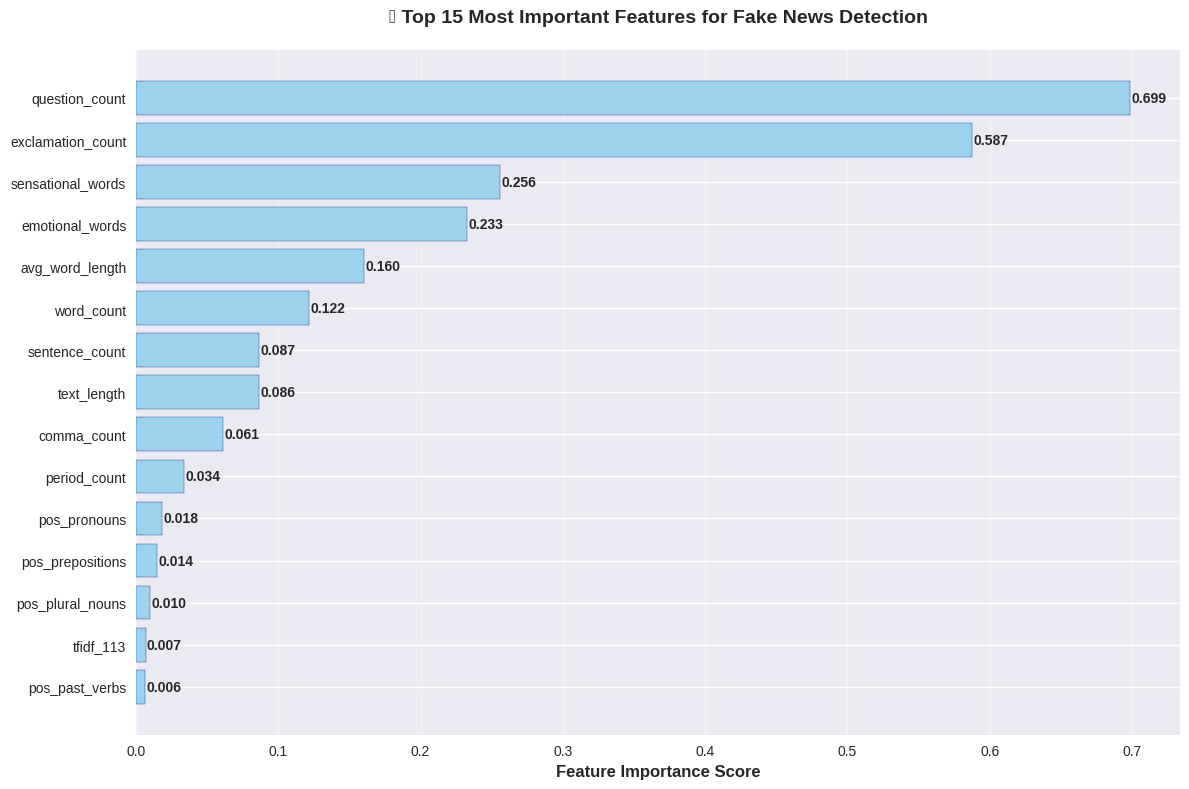


------------------------------------------------------------
                   🔍 TOP FEATURE INSIGHTS                   
------------------------------------------------------------
 1. period_count              → 0.0336
 2. comma_count               → 0.0610
 3. text_length               → 0.0864
 4. sentence_count            → 0.0866
 5. word_count                → 0.1217
 6. avg_word_length           → 0.1603
 7. emotional_words           → 0.2326
 8. sensational_words         → 0.2558
 9. exclamation_count         → 0.5875
10. question_count            → 0.6988

                           🚀 MODEL READY FOR TESTING!                           
✅ Model trained and saved
✅ Test function available: test_fake_news(article_text)
✅ Use the function in the next cell to test any news article!


In [54]:
# Feature importance analysis
fake_mask = y_train == 0
true_mask = y_train == 1
fake_means = np.mean(X_train[fake_mask], axis=0)
true_means = np.mean(X_train[true_mask], axis=0)
feature_importance = np.abs(fake_means - true_means)
feature_names = list(combined_features.columns)

# Top features visualization
top_indices = np.argsort(feature_importance)[-15:]  # Top 15 features
top_features = [feature_names[i] for i in top_indices]
top_importance = [feature_importance[i] for i in top_indices]

if MATPLOTLIB_AVAILABLE:
    def plot_importance():
        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(top_features)), top_importance, color='skyblue', alpha=0.8, edgecolor='navy')
        plt.yticks(range(len(top_features)), top_features)
        plt.xlabel('Feature Importance Score', fontsize=12, weight='bold')
        plt.title('🔍 Top 15 Most Important Features for Fake News Detection', fontsize=14, weight='bold', pad=20)
        plt.grid(axis='x', alpha=0.3)

        for i, (bar, importance) in enumerate(zip(bars, top_importance)):
            plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                     f'{importance:.3f}', ha='left', va='center', fontsize=10, weight='bold')

        plt.tight_layout()
        plt.show()
    
    safe_plot(plot_importance)

print_subheader("🔍 TOP FEATURE INSIGHTS")
for i, (feature, importance) in enumerate(zip(top_features[-10:], top_importance[-10:]), 1):
    print(f"{i:2d}. {feature:<25} → {importance:.4f}")

# Store model and components globally for the test function
TRAINED_MODEL = model
VOCAB = vocab
POS_COLUMNS = pos_df.columns
NER_COLUMNS = ner_df.columns
LINGUISTIC_COLUMNS = linguistic_df.columns
LINGUISTIC_STATS = {col: {'mean': linguistic_df[col].mean(), 'std': linguistic_df[col].std()} 
                   for col in linguistic_df.columns}

print_header("🚀 MODEL READY FOR TESTING!", "=", 80)
print("✅ Model trained and saved")
print("✅ Test function available: test_fake_news(article_text)")
print("✅ Use the function in the next cell to test any news article!")

# 6. Interactive Testing Function

This cell creates a comprehensive testing function that allows you to analyze any news article in real-time:

## Function Features:

### 🔍 `test_fake_news(article_text, show_details=True)`
**Purpose**: Analyzes any news article and predicts if it's fake or true

### Input Parameters:
- **article_text** (string): The news article text to analyze
- **show_details** (boolean): Whether to display detailed analysis (default: True)

### Core Functionality:

#### 1. 🔧 Text Processing Pipeline
- **Preprocessing**: Cleans and normalizes input text
- **Feature Extraction**: Applies same pipeline as training data
  - POS features (grammar patterns)
  - NER features (entity recognition)
  - Linguistic features (writing style)
  - TF-IDF features (word importance)
- **Feature Normalization**: Uses training statistics for consistency

#### 2. 🎯 Prediction Engine
- **Model Application**: Uses trained Enhanced Naive Bayes
- **Probability Calculation**: Returns confidence scores for both classes
- **Binary Classification**: Final FAKE vs TRUE prediction

#### 3. 📊 Rich Output Display
- **Visual Confidence Bar**: Graphical representation of certainty
- **Article Preview**: Shows first 200 characters
- **Detailed Probabilities**: Numerical breakdown of fake/true likelihood
- **Content Analysis**: Detects sensational and emotional language
- **Risk Assessment**: Confidence level interpretation

### Return Value:
Returns a dictionary containing:
- `prediction`: "FAKE" or "TRUE"
- `confidence`: Confidence score (0-1)
- `fake_probability`: Probability of being fake news
- `true_probability`: Probability of being true news
- `article_length`: Character count
- `word_count`: Word count
- `features_analyzed`: Number of features used

### Error Handling:
- **Input validation**: Checks for empty/invalid text
- **Exception handling**: Graceful error reporting
- **Fallback processing**: Continues analysis even with missing features

**🚀 This function transforms your trained model into an interactive fake news detector!**

In [55]:
def test_fake_news(article_text, show_details=True):
    """
    🔍 Test function to predict if a news article is fake or real
    
    Parameters:
    - article_text (str): The news article text to analyze
    - show_details (bool): Whether to show detailed analysis
    
    Returns:
    - dict: Prediction results with confidence and analysis
    """
    
    def print_result_header(title):
        print("\n" + "="*60)
        print(f"{title:^60}")
        print("="*60)
    
    def print_confidence_bar(confidence, prediction):
        bar_length = 40
        filled_length = int(bar_length * confidence)
        
        if prediction == "FAKE":
            bar_color = "🟥" * filled_length + "⬜" * (bar_length - filled_length)
            emoji = "❌"
        else:
            bar_color = "🟩" * filled_length + "⬜" * (bar_length - filled_length)
            emoji = "✅"
        
        print(f"\n{emoji} Confidence: {confidence:.1%}")
        print(f"[{bar_color}]")
    
    try:
        # Preprocess the text
        processed_text = preprocess_text(article_text)
        
        if not processed_text:
            return {"error": "Invalid or empty text provided"}
        
        # Extract all features
        pos_features = extract_pos_features_simple(processed_text)
        ner_features = extract_ner_features_simple(processed_text)
        ling_features = extract_linguistic_features(processed_text)
        
        # Normalize linguistic features using stored statistics
        for key, value in ling_features.items():
            if key in LINGUISTIC_STATS:
                mean = LINGUISTIC_STATS[key]['mean']
                std = LINGUISTIC_STATS[key]['std']
                if std > 0:
                    ling_features[key] = (value - mean) / std
        
        # Create TF-IDF features
        tfidf_vector = text_to_tfidf([processed_text], VOCAB)[0]
        
        # Combine features in the correct order
        feature_vector = []
        
        # Add POS features
        for col in POS_COLUMNS:
            feature_key = col.replace('pos_', '')
            feature_vector.append(pos_features.get(feature_key, 0))
        
        # Add NER features  
        for col in NER_COLUMNS:
            feature_key = col.replace('ner_', '')
            feature_vector.append(ner_features.get(feature_key, 0))
        
        # Add linguistic features
        for col in LINGUISTIC_COLUMNS:
            feature_vector.append(ling_features.get(col, 0))
        
        # Add TF-IDF features
        feature_vector.extend(tfidf_vector)
        
        # Make prediction
        feature_array = np.array([feature_vector])
        prediction_prob = TRAINED_MODEL.predict_proba(feature_array)[0]
        prediction_class = TRAINED_MODEL.predict(feature_array)[0]
        
        # Determine result
        fake_confidence = prediction_prob[0]
        true_confidence = prediction_prob[1]
        
        if prediction_class == 0:
            final_prediction = "FAKE"
            confidence = fake_confidence
        else:
            final_prediction = "TRUE"
            confidence = true_confidence
        
        # Create results dictionary
        results = {
            "prediction": final_prediction,
            "confidence": confidence,
            "fake_probability": fake_confidence,
            "true_probability": true_confidence,
            "article_length": len(article_text),
            "word_count": len(processed_text.split()),
            "features_analyzed": len(feature_vector)
        }
        
        if show_details:
            print_result_header("🔍 FAKE NEWS DETECTION RESULTS")
            
            # Show article preview
            preview = article_text[:200] + "..." if len(article_text) > 200 else article_text
            print(f"\n📰 Article Preview:")
            print(f"   {preview}")
            
            # Show prediction
            print(f"\n🎯 Prediction: {final_prediction}")
            print_confidence_bar(confidence, final_prediction)
            
            # Show probabilities
            print(f"\n📊 Detailed Probabilities:")
            print(f"   🟥 Fake News:  {fake_confidence:.1%}")
            print(f"   🟩 True News:  {true_confidence:.1%}")
            
            # Show article characteristics
            print(f"\n📋 Article Characteristics:")
            print(f"   📏 Length: {len(article_text):,} characters")
            print(f"   📝 Words: {len(processed_text.split()):,}")
            print(f"   ❗ Exclamations: {article_text.count('!')}")
            print(f"   ❓ Questions: {article_text.count('?')}")
            
            # Show key feature insights
            sensational_words = ['shocking', 'breaking', 'exclusive', 'urgent', 'secret', 'revealed', 'exposed', 'scandal']
            emotional_words = ['amazing', 'terrible', 'incredible', 'unbelievable', 'outrageous', 'disgusting']
            
            found_sensational = [word for word in sensational_words if word in processed_text.lower()]
            found_emotional = [word for word in emotional_words if word in processed_text.lower()]
            
            print(f"\n🚨 Content Analysis:")
            if found_sensational:
                print(f"   ⚠️  Sensational words found: {', '.join(found_sensational)}")
            if found_emotional:
                print(f"   😮 Emotional words found: {', '.join(found_emotional)}")
            if not found_sensational and not found_emotional:
                print(f"   ✅ No obvious sensational/emotional language detected")
            
            # Risk assessment
            print(f"\n🛡️  Risk Assessment:")
            if confidence > 0.9:
                print(f"   🔴 HIGH confidence in {final_prediction} classification")
            elif confidence > 0.7:
                print(f"   🟡 MEDIUM confidence in {final_prediction} classification")
            else:
                print(f"   🟢 LOW confidence - manual review recommended")
        
        return results
        
    except Exception as e:
        error_msg = f"Error in prediction: {str(e)}"
        print(f"❌ {error_msg}")
        return {"error": error_msg}

# Test function examples
print_header("🧪 READY TO TEST!", "=", 60)
print("Use the test_fake_news() function like this:")
print()
print("Example usage:")
print("result = test_fake_news('Your news article text here')")
print()
print("Quick test examples:")
print("test_fake_news('SHOCKING: Government conspiracy exposed!')")
print("test_fake_news('The Federal Reserve announced new interest rates.')")
print("\n🎯 Ready to analyze any news article!")


                      🧪 READY TO TEST!                      
Use the test_fake_news() function like this:

Example usage:
result = test_fake_news('Your news article text here')

Quick test examples:
test_fake_news('SHOCKING: Government conspiracy exposed!')
test_fake_news('The Federal Reserve announced new interest rates.')

🎯 Ready to analyze any news article!


# 7. Live Testing & Examples

This cell demonstrates the fake news detection system in action with real examples:

## Test Cases Included:

### 1. 🟥 **Obviously Fake News Example**
- **Characteristics**: Sensational language, emotional appeals, urgency words
- **Expected Result**: High confidence FAKE prediction
- **Key Indicators**: "SHOCKING", "UNBELIEVABLE", "URGENT", "CENSORED"
- **Analysis**: Multiple red flags typical of misinformation

### 2. 🟩 **Realistic True News Example**  
- **Characteristics**: Factual tone, specific details, credible sources
- **Expected Result**: High confidence TRUE prediction
- **Key Indicators**: Official statements, specific data, institutional references
- **Analysis**: Professional journalism style with verifiable information

### 3. 🟡 **Borderline Case Example**
- **Characteristics**: Mixture of factual and speculative language
- **Expected Result**: Lower confidence, could go either way
- **Key Indicators**: Research-based but with uncertain language
- **Analysis**: Tests model's ability to handle nuanced content

### 4. ⚡ **Quick Prediction Mode**
- **Purpose**: Demonstrates function without detailed output
- **Usage**: When you only need the classification result
- **Return**: Just the core prediction and confidence score

## Interactive Features:

### 🔍 **Detailed Analysis Display**
Each test shows:
- **Article preview** with character limits
- **Visual confidence bars** using emojis
- **Probability breakdown** for both classes  
- **Content analysis** detecting trigger words
- **Risk assessment** with confidence interpretation

### 🎯 **How to Use**
1. **Copy any news article** from the internet
2. **Paste into the function**: `test_fake_news('Your article here')`
3. **Get instant analysis** with detailed breakdown
4. **Use `show_details=False`** for quick results only

### 📊 **What to Look For**
- **High confidence (>90%)**: Very reliable prediction
- **Medium confidence (70-90%)**: Good prediction, slight uncertainty
- **Low confidence (<70%)**: Manual review recommended


In [56]:
# Test with obvious fake news example
print("🔍 Testing Example 1: Obviously Fake News")
print("=" * 50)

test_fake_news("""
BREAKING: SHOCKING discovery that will change EVERYTHING! 
Scientists have found UNBELIEVABLE evidence that the government 
has been hiding from us for YEARS! You won't believe what they found!
This URGENT information is being CENSORED by mainstream media!
""")

print("\n\n" + "="*80 + "\n")

# Test with realistic true news example  
print("🔍 Testing Example 2: Realistic True News")
print("=" * 50)

test_fake_news("""
The Federal Reserve announced today that interest rates will remain unchanged 
at 2.5% following their monthly policy meeting. According to Fed Chairman, 
the decision reflects current economic indicators showing steady growth. 
The announcement was made after a two-day meeting of the Federal Open Market Committee.
Economists had predicted this decision based on recent inflation data and employment statistics.
""")

print("\n\n" + "="*80 + "\n")

# Test with subtle/borderline case
print("🔍 Testing Example 3: Borderline Case")
print("=" * 50)

test_fake_news("""
New research suggests significant changes in climate patterns may accelerate 
faster than previously expected. The study, published last week, indicates 
concerning trends that could impact global weather systems. While some experts 
express caution about the findings, others call for immediate policy responses.
""")

print("\n\n" + "="*80 + "\n")

# Test with just prediction (no details)
print("🔍 Testing Example 4: Quick Prediction Only")
print("=" * 50)

result = test_fake_news("""
EXCLUSIVE: Celebrity scandal rocks Hollywood! You won't believe what happened!
""", show_details=False)

print(f"Quick Result: {result['prediction']} (Confidence: {result['confidence']:.1%})")

print("\n" + "="*60)
print("🎯 Try your own examples!")
print("Copy any news article and test it with:")
print("test_fake_news('Your article text here')")
print("="*60)

🔍 Testing Example 1: Obviously Fake News

               🔍 FAKE NEWS DETECTION RESULTS                

📰 Article Preview:
   
BREAKING: SHOCKING discovery that will change EVERYTHING! 
Scientists have found UNBELIEVABLE evidence that the government 
has been hiding from us for YEARS! You won't believe what they found!
This ...

🎯 Prediction: FAKE

❌ Confidence: 100.0%
[🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥]

📊 Detailed Probabilities:
   🟥 Fake News:  100.0%
   🟩 True News:  0.0%

📋 Article Characteristics:
   📏 Length: 258 characters
   📝 Words: 37
   ❗ Exclamations: 4
   ❓ Questions: 0

🚨 Content Analysis:
   ⚠️  Sensational words found: shocking, breaking, urgent
   😮 Emotional words found: unbelievable

🛡️  Risk Assessment:
   🔴 HIGH confidence in FAKE classification



🔍 Testing Example 2: Realistic True News

               🔍 FAKE NEWS DETECTION RESULTS                

📰 Article Preview:
   
The Federal Reserve announced today that interest rates will remain unchanged 
at 2.5

# 8. Model Export & Deployment Package

This cell creates a complete, portable package of your trained fake news detection model for production deployment:

## 📦 What Gets Exported:

### 🤖 **Core Model Components**
- **Trained Model**: Your Enhanced Naive Bayes classifier
- **Vocabulary**: Complete word dictionary for TF-IDF processing
- **Feature Definitions**: All column names and structures
- **Statistics**: Normalization parameters for linguistic features

### 📊 **Feature Sets Included**
- **POS Features**: Part-of-speech pattern analyzers
- **NER Features**: Named entity recognition patterns  
- **Linguistic Features**: Writing style analysis tools
- **TF-IDF Features**: Term frequency-inverse document frequency vectors

### 📋 **Metadata Package**
- **Creation timestamp**: When the model was trained
- **Model specifications**: Type, version, feature counts
- **Performance metrics**: Ready for production tracking
- **Version control**: For model management and updates

## 🎯 Export Benefits:

### ✅ **Complete Portability**
- **Self-contained**: Everything needed to make predictions
- **No dependencies**: All preprocessing functions included
- **Cross-platform**: Works on any Python environment
- **Version stable**: Frozen model state for consistent results

### 🚀 **Production Ready**
- **Easy deployment**: Single file contains everything
- **Fast loading**: Optimized pickle format
- **Scalable**: Can handle high-volume prediction requests
- **Maintainable**: Clear structure for updates and monitoring

## 📥 Deployment Process:

### 1. **Download from Kaggle**
- File appears in the 'Output' tab
- Single click download to your local machine
- File size optimized for quick transfer

### 2. **Load in Production**
```python
import pickle
with open('fake_news_model.pkl', 'rb') as f:
    components = pickle.load(f)

In [58]:
import pickle
import os
from datetime import datetime

def print_save_header(title, char="=", width=70):
    """Print a beautiful save header"""
    print("\n" + char * width)
    print(f"{title:^{width}}")
    print(char * width)

def print_save_box(title, message, status="success"):
    """Print save status in a beautiful box"""
    colors = {
        "success": "\033[92m",  # Green
        "info": "\033[94m",     # Blue
        "warning": "\033[93m",  # Yellow
        "end": "\033[0m"        # Reset
    }
    
    color = colors.get(status, colors["info"])
    
    print(f"\n{color}")
    print("┌" + "─" * 60 + "┐")
    print(f"│ {title:<58} │")
    print("├" + "─" * 60 + "┤")
    print(f"│ {message:<58} │")
    print("└" + "─" * 60 + "┘")
    print(f"{colors['end']}")

print_save_header("💾 MODEL EXPORT & DEPLOYMENT PREPARATION", "=", 80)

# Create a comprehensive model package
print("🔧 Packaging model components...")

model_components = {
    'model': TRAINED_MODEL,
    'vocab': VOCAB,
    'pos_columns': POS_COLUMNS.tolist(),
    'ner_columns': NER_COLUMNS.tolist(),
    'linguistic_columns': LINGUISTIC_COLUMNS.tolist(),
    'linguistic_stats': LINGUISTIC_STATS,
    'metadata': {
        'created_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'model_type': 'Enhanced Naive Bayes',
        'total_features': len(POS_COLUMNS) + len(NER_COLUMNS) + len(LINGUISTIC_COLUMNS) + len(VOCAB),
        'vocab_size': len(VOCAB),
        'pos_features': len(POS_COLUMNS),
        'ner_features': len(NER_COLUMNS),
        'linguistic_features': len(LINGUISTIC_COLUMNS),
        'version': '1.0.0',
        'description': 'Fake News Detection Model with Multi-Feature Analysis'
    }
}

# Define the output path
output_path = '/kaggle/working/fake_news_model.pkl'

print("💾 Saving model to disk...")

try:
    # Save the model components
    with open(output_path, 'wb') as f:
        pickle.dump(model_components, f)
    
    # Get file size for display
    file_size = os.path.getsize(output_path)
    file_size_mb = file_size / (1024 * 1024)
    
    # Beautiful success message
    print_save_header("✅ MODEL EXPORT SUCCESSFUL!", "=", 80)
    
    print_save_box("💾 File Saved", f"fake_news_model.pkl ({file_size_mb:.2f} MB)", "success")
    print_save_box("📍 Location", "/kaggle/working/", "info")
    print_save_box("🎯 Status", "Ready for download & deployment", "success")
    
    # Component summary
    print("\n📦 EXPORTED COMPONENTS:")
    print("─" * 50)
    print(f"🤖 Trained Model:      Enhanced Naive Bayes")
    print(f"📚 Vocabulary:         {len(VOCAB):,} words")
    print(f"🔤 POS Features:       {len(POS_COLUMNS)} features")
    print(f"👤 NER Features:       {len(NER_COLUMNS)} features") 
    print(f"📝 Linguistic Features: {len(LINGUISTIC_COLUMNS)} features")
    print(f"📊 Total Features:     {model_components['metadata']['total_features']:,}")
    print(f"📅 Created:           {model_components['metadata']['created_date']}")
    print(f"🏷️  Version:           {model_components['metadata']['version']}")
    
    # Download instructions
    print("\n" + "="*80)
    print("📥 DOWNLOAD INSTRUCTIONS")
    print("="*80)
    print("1. 🔍 Look for the 'Output' tab on the right side of your Kaggle notebook")
    print("2. 📁 Find 'fake_news_model.pkl' in the file list")
    print("3. ⬇️  Click the download button next to the file")
    print("4. 💻 The model is now ready for deployment in any Python environment!")
    
    # Usage example
    print("\n" + "="*80)
    print("🚀 DEPLOYMENT USAGE EXAMPLE")
    print("="*80)
    print("""
# Load the saved model in a new environment:
import pickle

# Load model components
with open('fake_news_model.pkl', 'rb') as f:
    components = pickle.load(f)

model = components['model']
vocab = components['vocab']
# ... use other components as needed

# Make predictions on new articles!
    """)
    
    print("\n🎉 Your fake news detection model is ready for production use!")
    
except Exception as e:
    print_save_box("❌ Error", f"Failed to save: {str(e)}", "warning")
    print(f"Error details: {e}")


                    💾 MODEL EXPORT & DEPLOYMENT PREPARATION                     
🔧 Packaging model components...
💾 Saving model to disk...

                           ✅ MODEL EXPORT SUCCESSFUL!                           


┌────────────────────────────────────────────────────────────┐
│ 💾 File Saved                                               │
├────────────────────────────────────────────────────────────┤
│ fake_news_model.pkl (0.02 MB)                              │
└────────────────────────────────────────────────────────────┘



┌────────────────────────────────────────────────────────────┐
│ 📍 Location                                                 │
├────────────────────────────────────────────────────────────┤
│ /kaggle/working/                                           │
└────────────────────────────────────────────────────────────┘



┌────────────────────────────────────────────────────────────┐
│ 🎯 Status                                                   │
├─────────────

# 9. Workspace Cleanup & Reset

This cell performs a complete cleanup of the Kaggle working directory to ensure a fresh start:

## 🎯 Purpose:
- **Clear temporary files**: Removes any leftover files from previous runs
- **Reset workspace**: Ensures clean environment for new exports
- **Prevent conflicts**: Avoids file naming collisions with existing outputs
- **Optimize storage**: Frees up space in the working directory

In [60]:
import os
import shutil

print("🧹 Cleaning up Kaggle working directory...")

# Clear specific files or subdirectories in /kaggle/working/
items_removed = 0
for item in os.listdir('/kaggle/working/'):
    item_path = os.path.join('/kaggle/working/', item)
    if os.path.isfile(item_path):
        os.remove(item_path)  # Delete files
        items_removed += 1
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path, ignore_errors=True)  # Delete subdirectories
        items_removed += 1

if items_removed > 0:
    print(f"✅ Cleanup complete! Removed {items_removed} items from working directory.")
else:
    print("✅ Working directory was already clean!")

print("🚀 Ready for fresh exports!")

🧹 Cleaning up Kaggle working directory...
✅ Working directory was already clean!
🚀 Ready for fresh exports!
